In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [6]:
x_val = x_train[50000:60000]
y_val = y_train[50000:60000]
x_train = x_train[0:50000]
y_train = y_train[0:50000]

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [11]:
hist = model.fit(x_train, y_train, epochs=5, validation_data=[x_val, y_val])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 172us/step - loss: 0.1669 - accuracy: 0.9481 - val_loss: 0.0610 - val_accuracy: 0.9822
Epoch 2/5
50000/50000 [==============================] - 7s 130us/step - loss: 0.0499 - accuracy: 0.9835 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 3/5
50000/50000 [==============================] - 6s 128us/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0465 - val_accuracy: 0.9858
Epoch 4/5
50000/50000 [==============================] - 6s 128us/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 5/5
50000/50000 [==============================] - 6s 127us/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9885


In [12]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[0.16692282210033388, 0.049935522465538236, 0.034653905465626154, 0.027235700006345287, 0.022739274151942226]
[0.9481, 0.98352, 0.98928, 0.99124, 0.9926]


In [13]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 57us/step
[0.031999263159457406, 0.9902999997138977]


In [14]:
result = model.predict(x_test)
result[0]

array([2.0402429e-09, 6.6151074e-08, 6.4463495e-07, 1.0863436e-06,
       1.9701479e-10, 7.2610213e-08, 4.5666639e-12, 9.9999785e-01,
       6.8610653e-08, 2.2912856e-07], dtype=float32)

In [15]:
result2 = model.predict_classes(x_test)
result2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
import matplotlib.pyplot as plt

def draw_plot(hist):
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

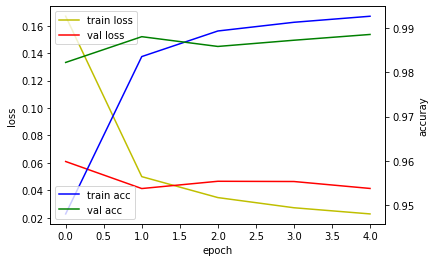

In [17]:
draw_plot(hist)